In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [4]:
datapath = '../input/student-demographics-online-education-dataoulad/'

studentInfo_df     = pd.read_csv('studentInfo.csv')
assessments_df     = pd.read_csv( 'assessments.csv')
studAssessments_df = pd.read_csv('studentAssessment.csv')
studentVle_df      = pd.read_csv( 'studentVle.csv')
vle_df             = pd.read_csv('vle.csv')

studentInfo_df.info()
studentInfo_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [5]:
exams  = assessments_df[assessments_df["assessment_type"] == "Exam"]
others = assessments_df[assessments_df["assessment_type"] != "Exam"]

amounts = others.groupby(["code_module","code_presentation"]).count()["id_assessment"] 
amounts = amounts.reset_index()
amounts.head()

,code_module,code_presentation,id_assessment
0,AAA,2013J,5
1,AAA,2014J,5
2,BBB,2013B,11
3,BBB,2013J,11
4,BBB,2014B,11


In [6]:
stud_ass =pd.merge(studAssessments_df, others,how="inner",on=["id_assessment"])
stud_ass["weighted_grade"] = stud_ass["score"]*stud_ass["weight"]/100

In [7]:
avg_grade = stud_ass.groupby(["id_student","code_module","code_presentation"]).sum()["weighted_grade"].reset_index()
avg_grade.head()

,id_student,code_module,code_presentation,weighted_grade
0,6516,AAA,2014J,63.50
1,8462,DDD,2013J,34.90
2,8462,DDD,2014J,43.00
3,11391,AAA,2013J,82.40
4,23629,BBB,2013B,16.69


In [8]:
stud_exams = pd.merge(studAssessments_df, exams, how="inner", on=["id_assessment"])
stud_exams["exam_score"] = stud_exams["score"]
stud_exams.drop(["id_assessment","date_submitted","is_banked", "score","assessment_type","date","weight"],axis=1,inplace=True)
stud_exams.head()

,id_student,code_module,code_presentation,exam_score
0,558914,CCC,2014B,32.0
1,559706,CCC,2014B,78.0
2,559770,CCC,2014B,54.0
3,560114,CCC,2014B,64.0
4,560311,CCC,2014B,100.0


In [9]:
vle_df[~vle_df["week_from"].isna()]

,id_site,code_module,code_presentation,activity_type,week_from,week_to
113,546732,AAA,2013J,oucontent,2.0,2.0
198,546719,AAA,2013J,oucontent,1.0,1.0
210,546681,AAA,2013J,oucontent,1.0,1.0
264,877040,AAA,2014J,oucontent,2.0,2.0
323,877045,AAA,2014J,oucontent,1.0,1.0
...,...,...,...,...,...,...
6243,798728,GGG,2014B,resource,1.0,1.0
6266,897051,GGG,2014J,resource,2.0,2.0
6285,897121,GGG,2014J,resource,1.0,1.0
6304,897050,GGG,2014J,resource,1.0,1.0


In [10]:
avg_per_site = studentVle_df.groupby(["id_student","id_site","code_module","code_presentation"]).mean().reset_index()
avg_per_site.head()

,id_student,id_site,code_module,code_presentation,date,sum_click
0,6516,877011,AAA,2014J,210.333333,3.833333
1,6516,877012,AAA,2014J,90.833333,2.310606
2,6516,877015,AAA,2014J,113.461538,2.000000
3,6516,877023,AAA,2014J,122.666667,2.000000
4,6516,877025,AAA,2014J,41.142857,4.333333


In [11]:
avg_per_student = avg_per_site.groupby(["id_student","code_module","code_presentation"]).mean()[["date","sum_click"]].reset_index()
avg_per_student.head()

,id_student,code_module,code_presentation,date,sum_click
0,6516,AAA,2014J,105.292573,5.816135
1,8462,DDD,2013J,38.794704,1.734524
2,8462,DDD,2014J,10.000000,3.000000
3,11391,AAA,2013J,111.739069,4.231515
4,23629,BBB,2013B,33.409632,2.817316


In [12]:
assessment_info = pd.merge(avg_grade, stud_exams, how="inner", on=["id_student","code_module","code_presentation"])
assessment_info.head()

,id_student,code_module,code_presentation,weighted_grade,exam_score
0,23698,CCC,2014J,69.97,80.0
1,24213,DDD,2014B,78.40,58.0
2,27116,CCC,2014J,92.02,96.0
3,28046,DDD,2013J,49.90,40.0
4,28787,CCC,2014J,11.98,44.0


In [13]:
df_1     = pd.merge(studentInfo_df, assessment_info, how="inner", on=["id_student","code_module","code_presentation"])
final_df = pd.merge(df_1,           avg_per_student, how="inner", on=["id_student","code_module","code_presentation"])

final_df.drop(["id_student","code_module","code_presentation"], axis = 1, inplace = True)

final_df.head()

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,weighted_grade,exam_score,date,sum_click
0,M,East Anglian Region,A Level or Equivalent,50-60%,0-35,0,90,N,Distinction,89.65,94.0,103.457907,2.706754
1,M,East Anglian Region,HE Qualification,40-50%,0-35,0,60,N,Pass,84.58,76.0,87.617265,1.539047
2,M,Ireland,A Level or Equivalent,NaN,35-55,0,30,N,Pass,51.44,66.0,49.181286,1.562619
3,M,Scotland,HE Qualification,90-100%,35-55,0,60,N,Pass,75.13,50.0,118.698642,2.189217
4,M,East Anglian Region,HE Qualification,60-70%,35-55,0,60,N,Distinction,93.22,98.0,75.791987,2.100617


In [14]:
final_df.describe()

,num_of_prev_attempts,studied_credits,weighted_grade,exam_score,date,sum_click
count,4955.000000,4955.000000,4955.000000,4955.000000,4955.000000,4955.000000
mean,0.118668,76.351160,66.224955,65.569929,101.032651,2.016386
std,0.395326,34.735952,21.285564,20.583311,24.915355,0.722199
min,0.000000,30.000000,1.120000,0.000000,17.566546,1.000000
25%,0.000000,60.000000,51.432500,51.000000,84.668807,1.545728
50%,0.000000,60.000000,69.750000,67.000000,99.934002,1.802812
75%,0.000000,90.000000,83.600000,82.000000,116.608707,2.280217
max,5.000000,630.000000,100.000000,100.000000,237.035714,13.134308


In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4955 entries, 0 to 4954
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                4955 non-null   object 
 1   region                4955 non-null   object 
 2   highest_education     4955 non-null   object 
 3   imd_band              4600 non-null   object 
 4   age_band              4955 non-null   object 
 5   num_of_prev_attempts  4955 non-null   int64  
 6   studied_credits       4955 non-null   int64  
 7   disability            4955 non-null   object 
 8   final_result          4955 non-null   object 
 9   weighted_grade        4955 non-null   float64
 10  exam_score            4955 non-null   float64
 11  date                  4955 non-null   float64
 12  sum_click             4955 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 542.0+ KB


<AxesSubplot:>

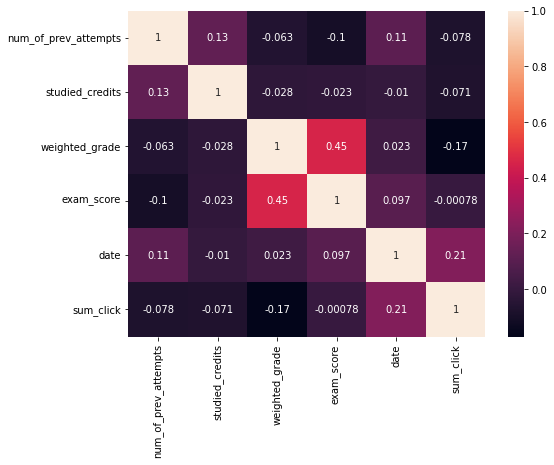

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(final_df.corr(),annot=True)

<AxesSubplot:xlabel='gender', ylabel='count'>

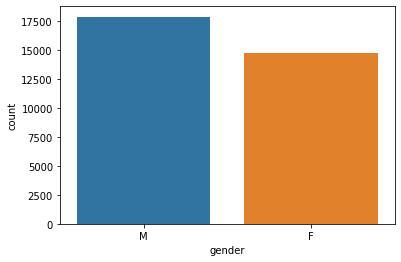

In [17]:
sns.countplot(x = studentInfo_df['gender']) 
# This chart shows that courses data us almost equally distributed on gender

<AxesSubplot:xlabel='age_band'>

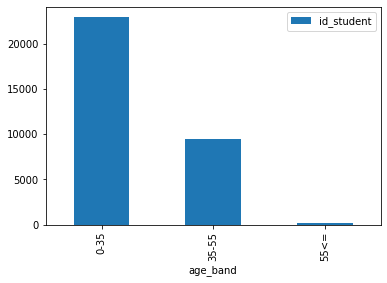

In [18]:
studentInfo_df[['id_student', 'age_band']].groupby(by = 'age_band').count().plot.bar()
# This chart shows the age group of the bands

<AxesSubplot:xlabel='region'>

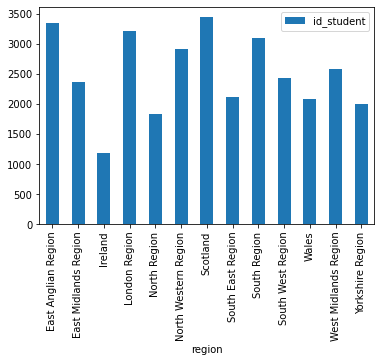

In [19]:
studentInfo_df[['id_student', 'region']].groupby(by = 'region').count().plot.bar()
# The chart shows the distribution of students by area

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'East Anglian Region'),
  Text(1, 0, 'Scotland'),
  Text(2, 0, 'North Western Region'),
  Text(3, 0, 'South East Region'),
  Text(4, 0, 'West Midlands Region'),
  Text(5, 0, 'Wales'),
  Text(6, 0, 'North Region'),
  Text(7, 0, 'South Region'),
  Text(8, 0, 'Ireland'),
  Text(9, 0, 'South West Region'),
  Text(10, 0, 'East Midlands Region'),
  Text(11, 0, 'Yorkshire Region'),
  Text(12, 0, 'London Region')])

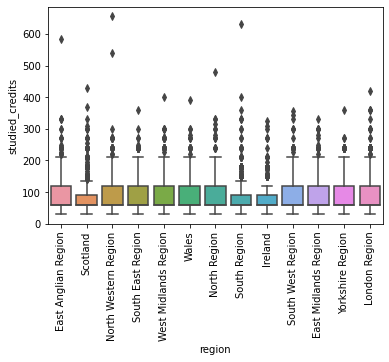

In [20]:
sns.boxplot(x = 'region', y = 'studied_credits', data = studentInfo_df)
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='final_result', ylabel='count'>

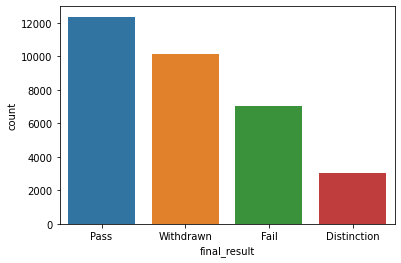

In [21]:
sns.countplot(data=studentInfo_df, x="final_result")

In [22]:
# selecting a subset of cols which are of importance and grouping them by student id and aggregating them using median
studentPerformance_df = studentInfo_df[['id_student', 'num_of_prev_attempts', 'studied_credits']].groupby('id_student').median().reset_index()
studentPerformance_df.head()

,id_student,num_of_prev_attempts,studied_credits
0,3733,0.0,60.0
1,6516,0.0,60.0
2,8462,0.5,75.0
3,11391,0.0,240.0
4,23629,2.0,60.0


<AxesSubplot:xlabel='num_of_prev_attempts', ylabel='count'>

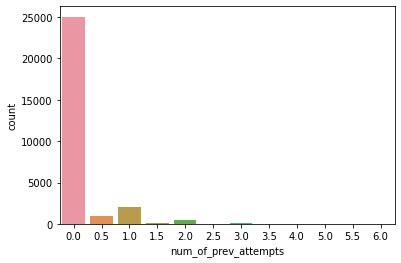

In [23]:
sns.countplot(x = studentPerformance_df['num_of_prev_attempts'])

<AxesSubplot:xlabel='code_module', ylabel='count'>

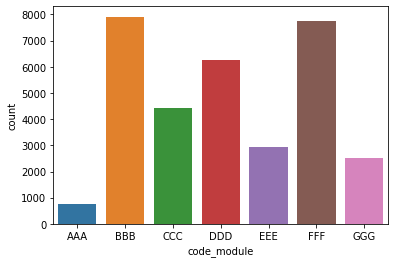

In [24]:
sns.countplot(x = studentInfo_df['code_module'])